In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [2]:
#Read in the data
customers_df = pd.read_csv('mallcustomers.csv')

In [3]:
#Display the data
customers_df

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,"15,000 USD",39
1,2,Male,21,"15,000 USD",81
2,3,Female,20,"16,000 USD",6
3,4,Female,23,"16,000 USD",77
4,5,Female,31,"17,000 USD",40
...,...,...,...,...,...
195,196,Female,35,"120,000 USD",79
196,197,Female,45,"126,000 USD",28
197,198,Male,32,"126,000 USD",74
198,199,Male,32,"137,000 USD",18


In [4]:
#Remove the comma and the "USD" from the "Income" column.
#Source: https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column

customers_df['Income'] = customers_df['Income'].map(lambda x: x.rstrip('USD'))
customers_df['Income'] = customers_df['Income'].replace(r',', '', regex=True).astype('float64')

In [5]:
#Eliminate CustomerID
customers_df.drop(columns='CustomerID', inplace=True)

In [6]:
#Run Summary Statistics on Income and SpendingScore
#Source: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
customers_df[["Income","SpendingScore"]].describe()

,Income,SpendingScore
count,200.000000,200.000000
mean,60560.000000,50.200000
std,26264.721165,25.823522
min,15000.000000,1.000000
25%,41500.000000,34.750000
50%,61500.000000,50.000000
75%,78000.000000,73.000000
max,137000.000000,99.000000


In [7]:
#Normalize Income and SpendingScore
#Sources: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
#https://www.statisticshowto.com/probability-and-statistics/z-score/
scaler = StandardScaler()
customers_df['Income'] = pd.DataFrame(scaler.fit_transform(customers_df[['Income']]))
customers_df['SpendingScore'] = pd.DataFrame(scaler.fit_transform(customers_df[['SpendingScore']]))

In [8]:
customers_df

,Gender,Age,Income,SpendingScore
0,Male,19,-1.738999,-0.434801
1,Male,21,-1.738999,1.195704
2,Female,20,-1.700830,-1.715913
3,Female,23,-1.700830,1.040418
4,Female,31,-1.662660,-0.395980
...,...,...,...,...
195,Female,35,2.268791,1.118061
196,Female,45,2.497807,-0.861839
197,Male,32,2.497807,0.923953
198,Male,32,2.917671,-1.250054


In [9]:
#Isolate Income and SpendingScore into a separate dataframe.
customers_df_slice = customers_df[['Income', 'SpendingScore']]

In [10]:
#Isolate Age and Gender into a separate dataframe
customers_df_age_gender = customers_df[['Age', 'Gender']]

In [11]:

X = customers_df_slice

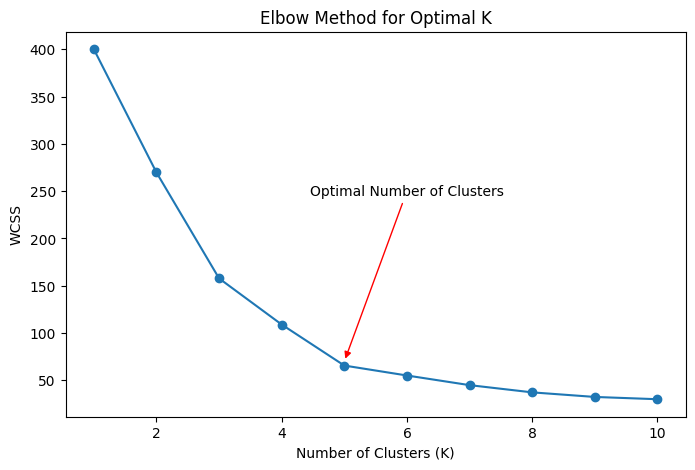

In [12]:
#Plot the elbow method to find the best number of clusters
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.filterwarnings("ignore")


wcss = []


for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.annotate("Optimal Number of Clusters", 
             xy = (5,70), xycoords='data',
             xytext = (6,250), textcoords='data',
             size = 10, va="center", ha="center",
             arrowprops=dict(arrowstyle="-|>", color='red')
                             )
plt.savefig("Elbow Method for Optimal K")
plt.show()

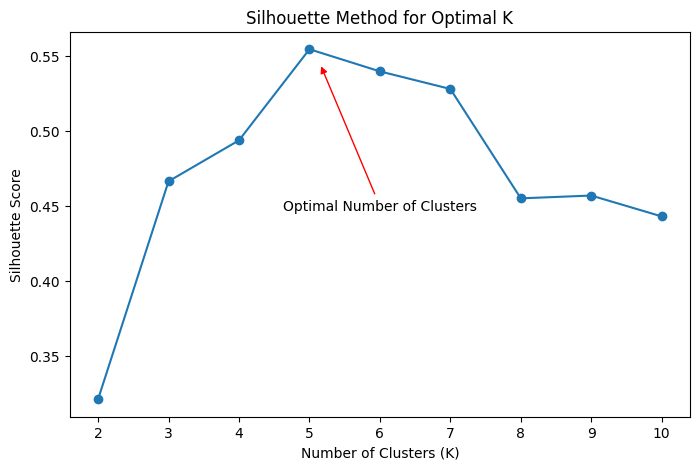

In [13]:
#Plot the silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # K must be at least 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.annotate("Optimal Number of Clusters", 
             xy = (5.15,0.545), xycoords='data',
             xytext = (6,0.45), textcoords='data',
             size = 10, va="center", ha="center",
             arrowprops=dict(arrowstyle="-|>", color='red')
                             )
plt.savefig('Silhouette Method for Optimal K')
plt.show()


In [14]:
#Set the number of clusters and fit the model to the data
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [15]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [16]:
#Make sure the predictions match the labels
y_pred is kmeans.labels_

True

In [17]:
#Display the cluster centers
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

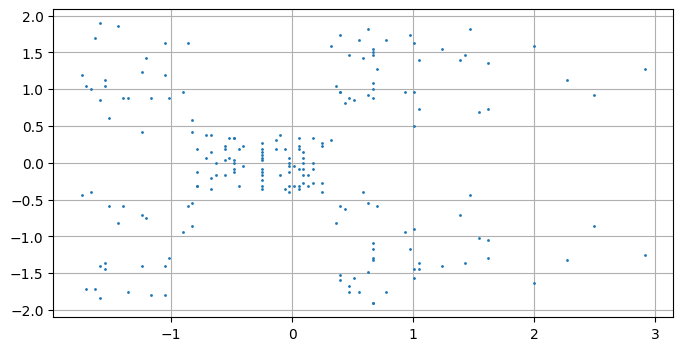

In [18]:
#Plot the clusters
#source:https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb
import warnings
warnings.filterwarnings("ignore")
def plot_clusters(X, y=None):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=1)
    

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

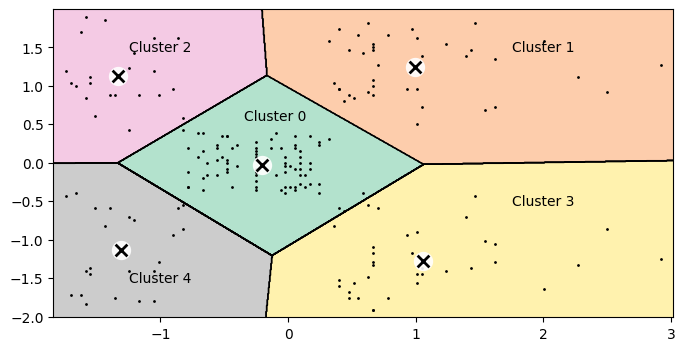

In [19]:
#Create a Voronoi diagram to plot the decision boundaries of each cluster
#source:https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

   

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

#Label each cluster
#Source:https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python
plt.annotate("Cluster 2", 
             xy = (-1.32954532,  1.13217788), xycoords='data',
             xytext = (-1,1.5), textcoords='data',
             size = 10, va="center", ha="center")
plt.annotate("Cluster 1", 
             xy = (0.99158305,  1.23950275), xycoords='data',
             xytext = (2, 1.5), textcoords='data',
             size = 10, va="center", ha="center")
plt.annotate("Cluster 4", 
             xy = (1.05500302, -1.28443907), xycoords='data',
             xytext = (-1, -1.5), textcoords='data',
             size = 10, va="center", ha="center")
plt.annotate("Cluster 3", 
             xy = (1.05500302, -1.28443907), xycoords='data',
             xytext = (2,-.5), textcoords='data',
             size = 10, va="center", ha="center")
plt.annotate("Cluster 0", 
             xy = (-0.20091257, -0.02645617), xycoords='data',
             xytext = (-.1, .6), textcoords='data',
             size = 10, va="center", ha="center")
plt.savefig("Voronoi diagram")
plt.show()

In [20]:
#Concatenate the two dataframes to restore the original structure.
customers_df_final = pd.concat([customers_df_age_gender, customers_df_slice], axis=1)

In [21]:
customers_df_final

,Age,Gender,Income,SpendingScore
0,19,Male,-1.738999,-0.434801
1,21,Male,-1.738999,1.195704
2,20,Female,-1.700830,-1.715913
3,23,Female,-1.700830,1.040418
4,31,Female,-1.662660,-0.395980
...,...,...,...,...
195,35,Female,2.268791,1.118061
196,45,Female,2.497807,-0.861839
197,32,Male,2.497807,0.923953
198,32,Male,2.917671,-1.250054


In [22]:
#Add the cluster labels as a column in the dataframe.
#Source: https://www.statology.org/k-means-clustering-in-python/
customers_df_final['Cluster']=kmeans.labels_

In [23]:
customers_df_final

,Age,Gender,Income,SpendingScore,Cluster
0,19,Male,-1.738999,-0.434801,4
1,21,Male,-1.738999,1.195704,2
2,20,Female,-1.700830,-1.715913,4
3,23,Female,-1.700830,1.040418,2
4,31,Female,-1.662660,-0.395980,4
...,...,...,...,...,...
195,35,Female,2.268791,1.118061,1
196,45,Female,2.497807,-0.861839,3
197,32,Male,2.497807,0.923953,1
198,32,Male,2.917671,-1.250054,3


In [24]:
#Sort the dataframe by cluster
customers_df_final.sort_values('Cluster')

,Age,Gender,Income,SpendingScore,Cluster
99,20,Male,0.016795,-0.046586,0
86,55,Female,-0.135883,0.302808,0
85,48,Male,-0.250391,-0.163051,0
84,21,Female,-0.250391,0.263987,0
83,46,Female,-0.250391,-0.240694,0
...,...,...,...,...,...
18,52,Male,-1.433644,-0.823017,4
16,35,Female,-1.509983,-0.590088,4
14,37,Male,-1.548152,-1.444162,4
10,67,Male,-1.586321,-1.405340,4


In [25]:
#Create dummy variables
customers_df_final = pd.get_dummies(customers_df_final, prefix_sep='_', drop_first = True)
                                                              

In [26]:
#Split the dataframe by cluster
#Source:https://www.geeksforgeeks.org/pandas/ways-to-filter-pandas-dataframe-by-column-values/#
cluster_0 = customers_df_final[customers_df_final['Cluster'] == 0]
cluster_1 = customers_df_final[customers_df_final['Cluster'] == 1]
cluster_2 = customers_df_final[customers_df_final['Cluster'] == 2]
cluster_3 = customers_df_final[customers_df_final['Cluster'] == 3]
cluster_4 = customers_df_final[customers_df_final['Cluster'] == 4]

In [27]:
#Display the mean age for each cluster
print("Mean Age for Cluster 0:", cluster_0['Age'].mean().round(2))
print("Mean Age for Cluster 1:", cluster_1['Age'].mean().round(2))
print("Mean Age for Cluster 2:", cluster_2['Age'].mean().round(2))
print("Mean Age for Cluster 3:", cluster_3['Age'].mean().round(2))
print("Mean Age for Cluster 4:", cluster_4['Age'].mean().round(2))

Mean Age for Cluster 0: 42.72
Mean Age for Cluster 1: 32.69
Mean Age for Cluster 2: 25.27
Mean Age for Cluster 3: 41.11
Mean Age for Cluster 4: 45.22


In [28]:
#Concatenate all cluster dataframes into one.
clusters = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3, cluster_4], axis=0)

In [29]:
#Rename the 'Gender_Male' dummy variable 'Gender'
#Source:https://www.geeksforgeeks.org/python/rename-specific-columns-in-pandas/
clusters.rename(columns={'Gender_Male': 'Gender'}, inplace = True)

#Change 'True' and 'False' to 'Male' and 'Female'
#Source:https://www.geeksforgeeks.org/data-analysis/how-to-replace-values-in-column-based-on-condition-in-pandas/
clusters.loc[clusters['Gender'] == True, 'Gender'] = 'Male'
clusters.loc[clusters['Gender'] == False, 'Gender'] = 'Female'
clusters

,Age,Income,SpendingScore,Cluster,Gender
43,31,-0.822933,0.419273,0,Female
46,50,-0.784763,0.186343,0,Female
47,27,-0.784763,-0.124229,0,Female
48,29,-0.784763,-0.318337,0,Female
49,31,-0.784763,-0.318337,0,Female
...,...,...,...,...,...
36,42,-1.013780,-1.288876,4,Female
38,36,-0.899272,-0.939482,4,Female
40,65,-0.861102,-0.590088,4,Female
42,48,-0.822933,-0.551266,4,Male


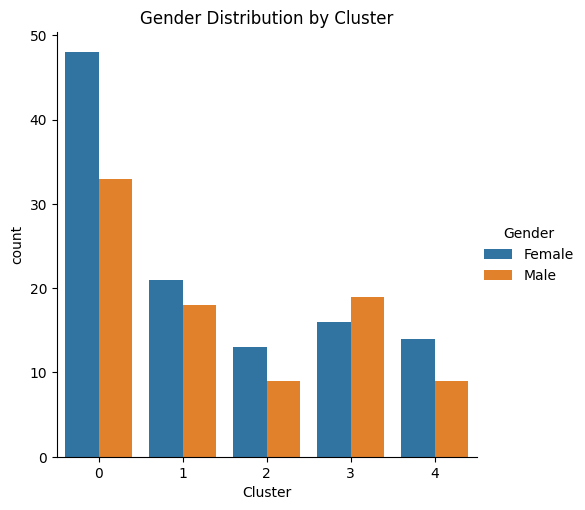

In [30]:
#Plot gender distribution for each cluster
#Sources: https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data
#         https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
from pypalettes import load_cmap
palette = load_cmap("Classic_10", keep_first_n=2).colors
sns.catplot(x='Cluster', hue='Gender', data=clusters, kind = 'count', palette=palette)
plt.title('Gender Distribution by Cluster')

#Source:https://stackoverflow.com/questions/45239261/savefig-text-chopped-off
plt.savefig("Gender Distribution by Cluster",dpi=300, bbox_inches = "tight")
plt.show()
                             

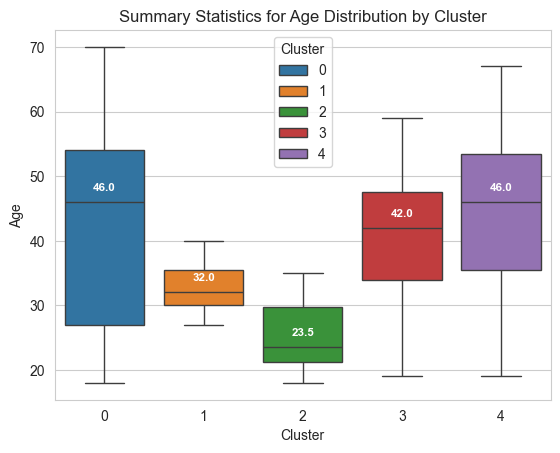

In [31]:
import warnings
warnings.filterwarnings("ignore")

#Plot summary of age distribution by cluster
#Source:https://www.geeksforgeeks.org/data-science/multi-plot-grid-in-seaborn/
sns.set_style('whitegrid')

palette = load_cmap("Classic_10", keep_first_n=5).colors
box_plot = sns.boxplot(data=clusters, x='Cluster', y = 'Age', hue='Cluster',  palette=palette)
plt.title('Summary Statistics for Age Distribution by Cluster')

#Source: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value


medians = clusters.groupby(['Cluster'])['Age'].median()
vertical_offset = clusters['Age'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
                  horizontalalignment = 'center', size='small', color='w', weight='semibold' )
plt.savefig("Age Distribution by Cluster")                
plt.show()